<a href="https://colab.research.google.com/github/mbk-dev/publications_RUS/blob/main/11%20compare_CAGR_of_assets.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

Статья [Сравнение доходности активов за 2021 год](https://rostsber.ru/publish/stocks/returns2021.html) на блоге "Рост Сбережений"

In [ ]:
!pip install okama

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12.0, 6.0]

import okama as ok

ok.__version__

'1.2.3'

## Активы

### 2006 для 15+ лет

In [2]:
ls_2006 = [
    'RGBITR.INDX',
    'MCFTR.INDX',
    'SP500TR.INDX',
    'IDCOTCTR.INDX',  # US Treasuries
    'SP500BDT.INDX',  # US bonds
    'FNER.INDX',  # REITS
    'MOW_SEC.RE',
    'GC.COMM',
    'SI.COMM',
    'USDRUB.FX',
    'EURRUB.FX'
]

In [3]:
lg_2006 = {
    'RGBITR.INDX': 'Облигации федерального займа РФ (Индекс RGBI)',
    'MCFTR.INDX': 'Акции РФ (Индекс Мосбиржи)',
    'SP500TR.INDX': 'Акции США (Индекс S&P 500)',
    'IDCOTCTR.INDX': 'Казначейские облигации США (Индекс ICE U.S Treasury Core Bond)',
    'SP500BDT.INDX': 'Корпоративные облигации США (Индекс S&P 500 bonds)',
    'FNER.INDX': 'Недвижимость США (Индекс REIT)',
    'MOW_SEC.RE': 'Недвижимость Москвы (цена кв. метра)',
    'GC.COMM': 'Золото (цены спот)',
    'SI.COMM': 'Серебро (цены спот)',
    'USDRUB.FX': 'Доллар США',
    'EURRUB.FX': 'Евро',
    'RUB.INFL': 'Инфляция'
}

### 2010 для 10+ лет

In [4]:
ls_2010 = ls_2006 + [
    'RUCBITR.INDX',  # c 2008
    'OKID10.INDX',  # c 2010 года
    'OKID.INDX',  # c 2010 года
]

In [5]:
lg_2010 = {**lg_2006, **{
    'RUCBITR.INDX': 'Корпоративные облигации РФ (индекс RUCBI)',
    'OKID10.INDX': 'Депозиты в рублях TOP10 (индекс OKID 10)',
    'OKID.INDX': 'Депозиты в рублях (индекс OKID)',
}}

## Функция рисования графиков

In [7]:
def plot_cagr(assets: ok.AssetList, legend_dic: dict, plot_title: str):
    fig, ax = plt.subplots(figsize=[12.0, 10.0])
    fig.subplots_adjust(right=1.2)

    inflation = assets.get_cagr()['RUB.INFL'] * 100
    names = assets.get_cagr().sort_values().index
    width = 0.7  # ширина прямоугольники (в данном случае высота)

    for name in names:
        value = assets.get_cagr()[name] * 100
        color = 'grey' if name == 'RUB.INFL' else 'green'
        if 0 <= value < inflation:
            color = 'yellow'
        elif value < 0:
            color = 'red'
        ax.barh(name, value, width, color=color)

    # Добавление титула и надписей на оси Y
    x = np.arange(len(names))  # the label locations
    ax.set_title(plot_title)
    ax.set_yticks(x)
    ax.set_yticklabels([legend_dic[x] for x in names])
    # ax.legend()

    # Добавление аннотаций к прямоугольникам
    rects = ax.containers
    for rect in rects:
        width = rect[0].get_width()  # Ширина прямоугольника
        shift = 20 if width >= 0 else -20
        ax.annotate(f'{width:.2f}%',
                    xy=(width, rect[0].get_y() + rect[0].get_height() / 2),
                    # координаты точки, откуда начинается аннотация
                    xytext=(shift, 0),  # смещение надписи вправо
                    textcoords="offset points",
                    ha='center', va='center')
    if any(assets.get_cagr().values < 0):
        ax.axvline(x=0, color='black', linewidth=1)  # вертикальная линия на отметке х=0

## 15 лет

In [6]:
assets15 = ok.AssetList(ls_2006, first_date='2008-01', last_date='2022-12', ccy='RUB')
assets15

assets           [RGBITR.INDX, MCFTR.INDX, SP500TR.INDX, IDCOTC...
currency                                                       RUB
first_date                                                 2008-01
last_date                                                  2022-12
period_length                                   15 years, 0 months
inflation                                                 RUB.INFL
dtype: object

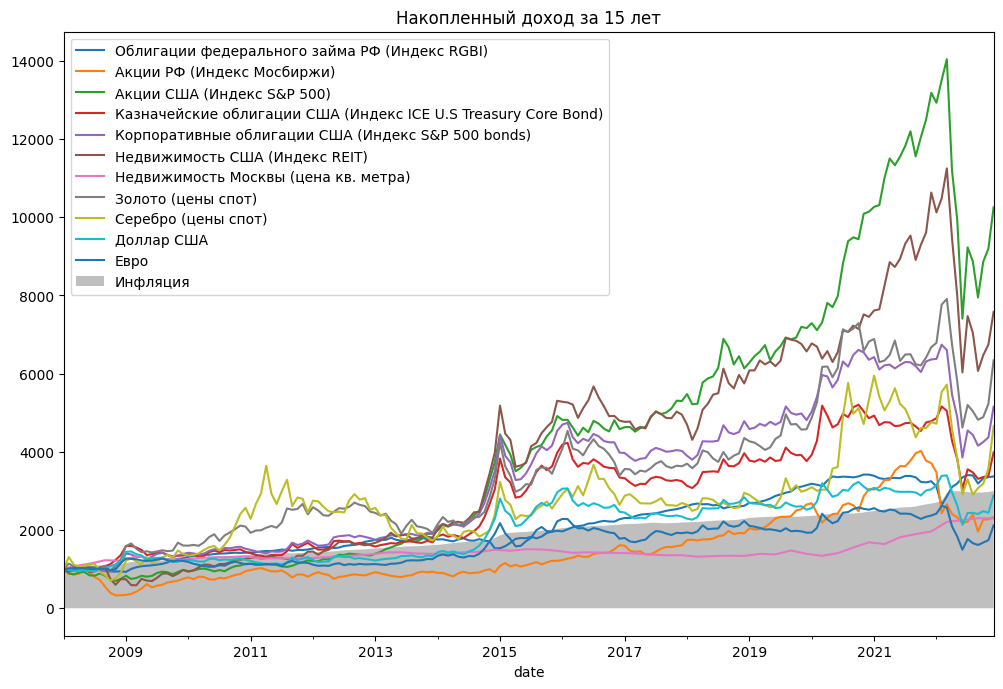

In [9]:
assets15.wealth_indexes.iloc[:, :-1].plot()
plt.fill_between(assets15.wealth_indexes.index.to_timestamp(), 0, assets15.wealth_indexes['RUB.INFL'], facecolor='grey', alpha=0.5)
plt.legend(lg_2006.values())
plt.title('Накопленный доход за 15 лет');

In [10]:
assets15.describe([1, 5, 10, 15])

,property,period,RGBITR.INDX,MCFTR.INDX,SP500TR.INDX,IDCOTCTR.INDX,SP500BDT.INDX,FNER.INDX,MOW_SEC.RE,GC.COMM,SI.COMM,USDRUB.FX,EURRUB.FX,inflation
0,Compound return,YTD,0.037134,-0.372608,-0.222149,-0.166889,-0.190346,-0.287201,0.171914,-0.050163,-0.022281,-0.050232,-0.106567,0.119228
1,CAGR,1 years,0.037134,-0.372608,-0.222149,-0.166889,-0.190346,-0.287201,0.171914,-0.050163,-0.022281,-0.050232,-0.106567,0.119228
2,CAGR,5 years,0.055736,0.076621,0.141042,0.04174,0.05065,0.088861,0.111297,0.118011,0.115649,0.042657,0.019806,0.064601
3,CAGR,10 years,0.069403,0.102188,0.224802,0.094369,0.111247,0.165199,0.052549,0.09885,0.063341,0.087978,0.06537,0.070559
4,CAGR,15 years,0.084354,0.057956,0.167855,0.096571,0.115496,0.144561,0.057148,0.131049,0.107947,0.073284,0.051314,0.075935
5,CAGR,"15 years, 0 months",0.084354,0.057956,0.167855,0.096571,0.115496,0.144561,0.057148,0.131049,0.107947,0.073284,0.051314,0.075935
6,Dividend yield,LTM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
7,Risk,"15 years, 0 months",0.093212,0.277774,0.240098,0.227121,0.22222,0.319971,0.046478,0.292773,0.425514,0.203981,0.198284,NaN
8,CVAR,"15 years, 0 months",0.175004,0.628204,0.335515,0.318676,0.354329,0.380812,0.058367,0.262041,0.41832,0.256432,0.345955,NaN
9,Max drawdowns,"15 years, 0 months",-0.228385,-0.679146,-0.472622,-0.415415,-0.427756,-0.463752,-0.127073,-0.415912,-0.525569,-0.371422,-0.427535,NaN


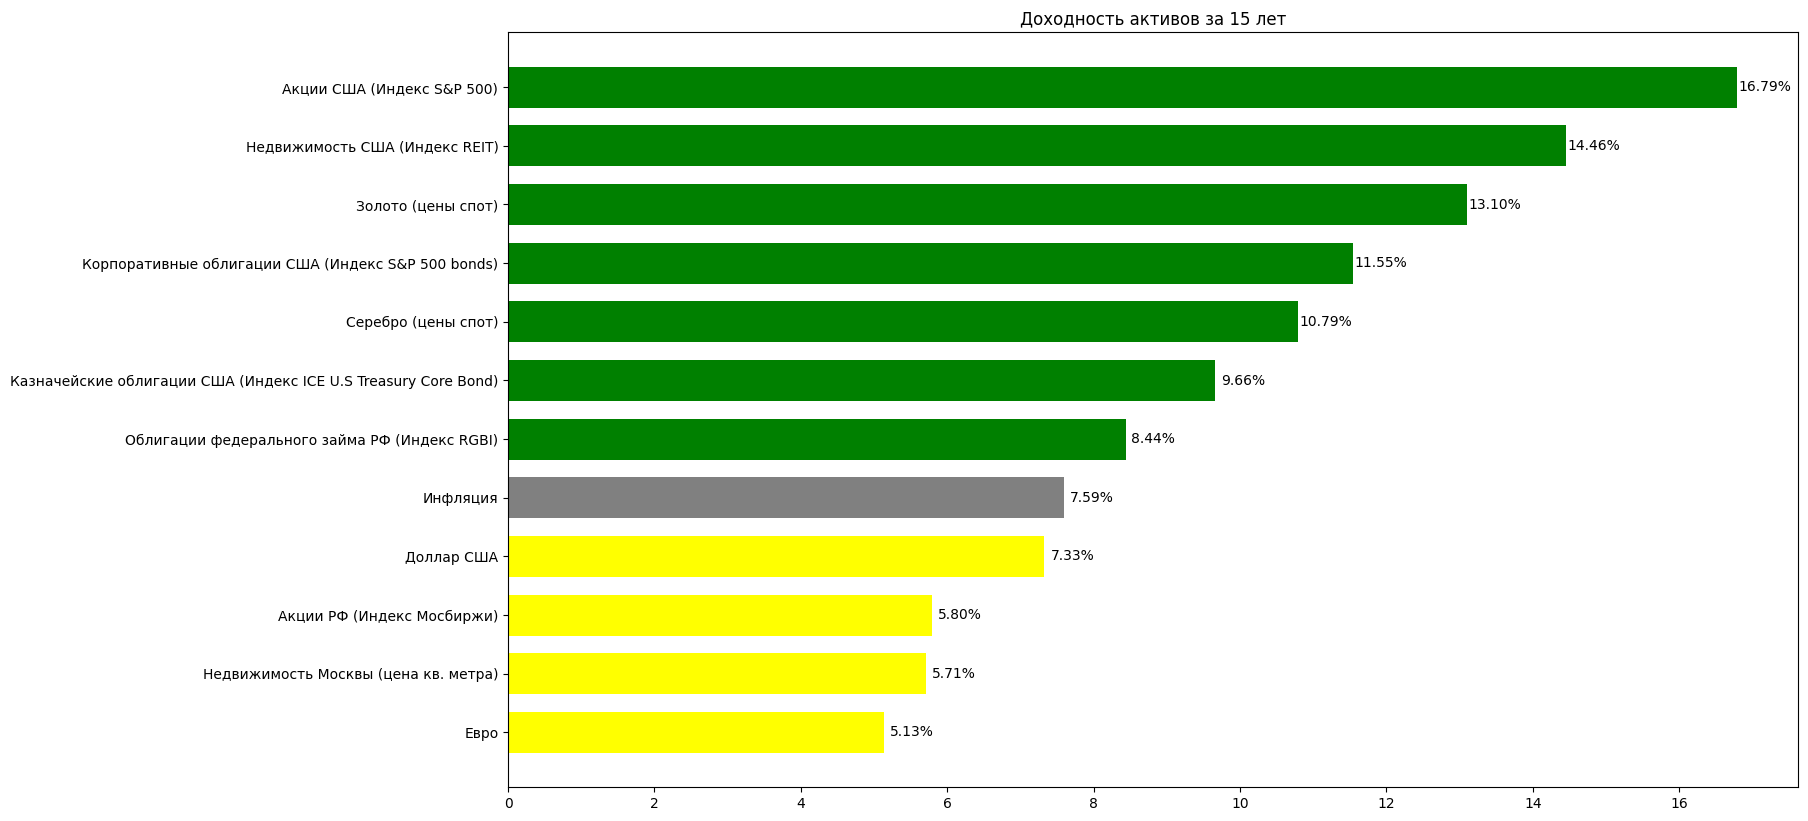

In [11]:
plot_cagr(assets15, lg_2006, 'Доходность активов за 15 лет')

## 10 лет

In [12]:
assets10 = ok.AssetList(ls_2010, first_date='2013-01', last_date='2022-12', ccy='RUB')
assets10

assets           [RGBITR.INDX, MCFTR.INDX, SP500TR.INDX, IDCOTC...
currency                                                       RUB
first_date                                                 2013-01
last_date                                                  2022-12
period_length                                   10 years, 0 months
inflation                                                 RUB.INFL
dtype: object

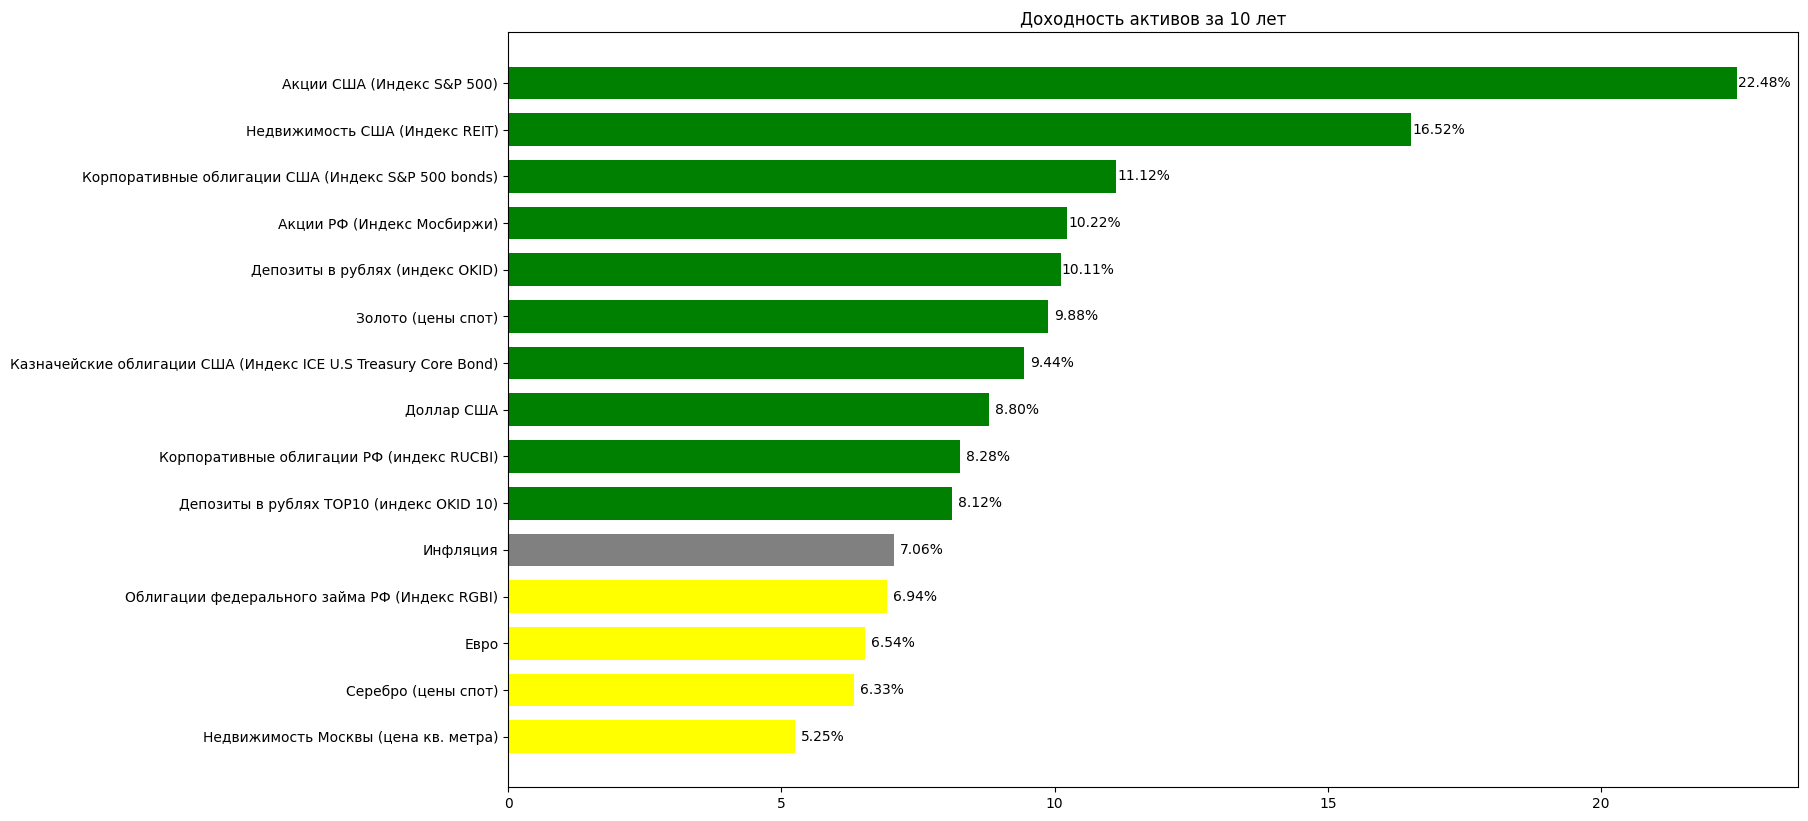

In [13]:
plot_cagr(assets10, lg_2010, 'Доходность активов за 10 лет')

## 5 лет

In [14]:
assets5 = ok.AssetList(ls_2010, first_date='2018-01', last_date='2022-12', ccy='RUB')
assets5

assets           [RGBITR.INDX, MCFTR.INDX, SP500TR.INDX, IDCOTC...
currency                                                       RUB
first_date                                                 2018-01
last_date                                                  2022-12
period_length                                    5 years, 0 months
inflation                                                 RUB.INFL
dtype: object

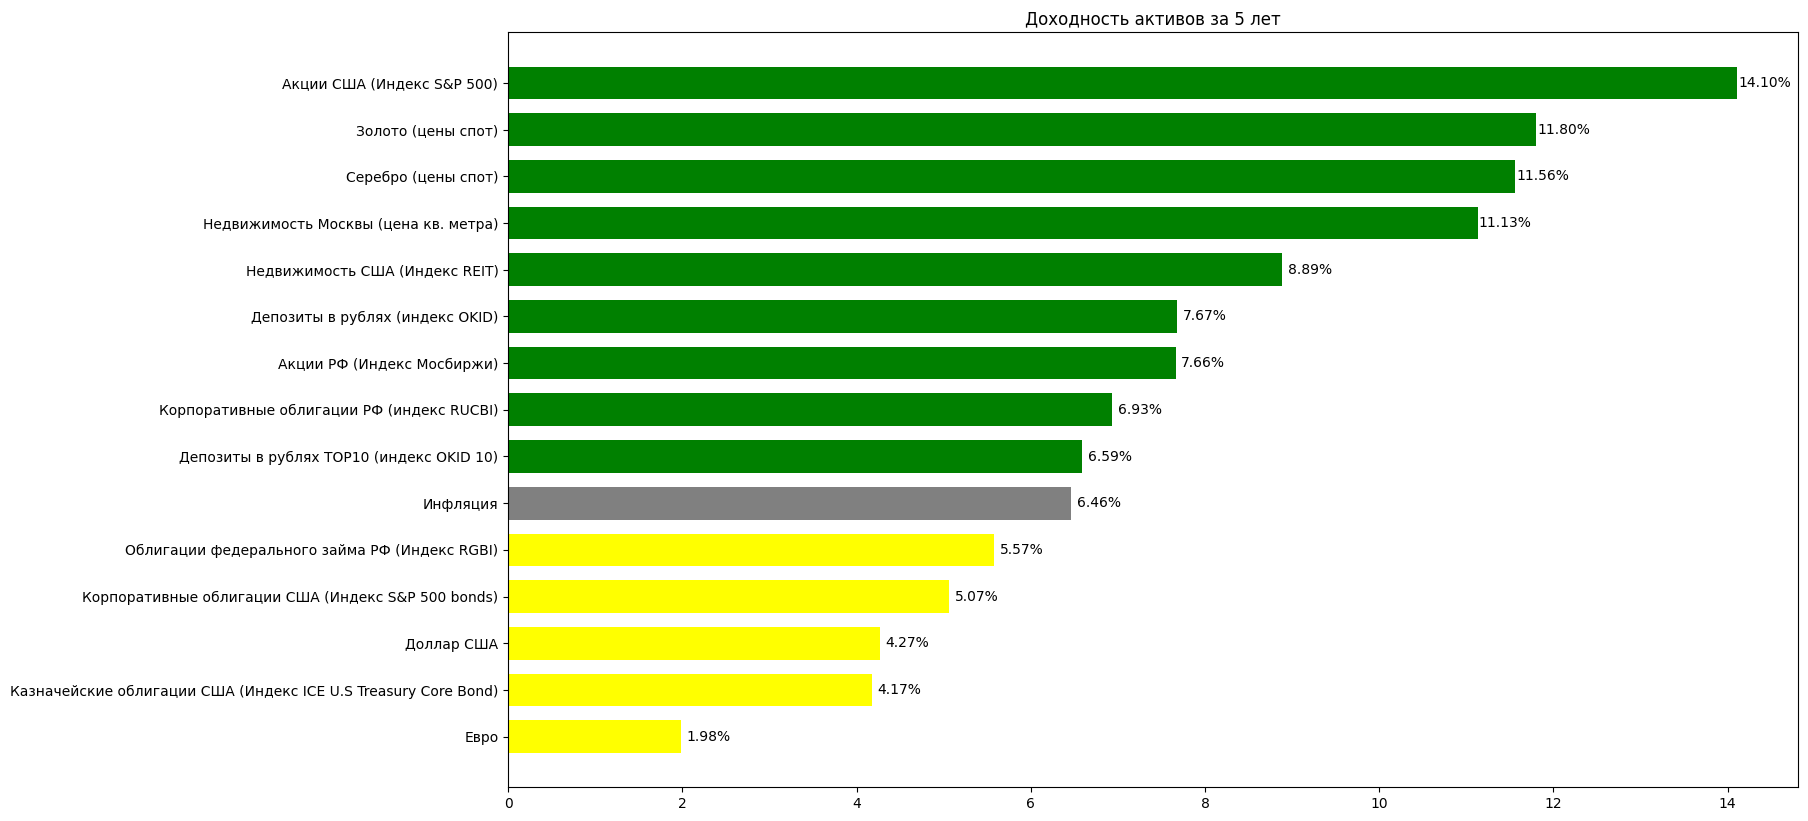

In [17]:
plot_cagr(assets5, lg_2010, 'Доходность активов за 5 лет')

In [18]:
assets5.describe([2, 3])

,property,period,RGBITR.INDX,MCFTR.INDX,SP500TR.INDX,IDCOTCTR.INDX,SP500BDT.INDX,FNER.INDX,MOW_SEC.RE,GC.COMM,SI.COMM,USDRUB.FX,EURRUB.FX,RUCBITR.INDX,OKID10.INDX,OKID.INDX,inflation
0,Compound return,YTD,0.037134,-0.372608,-0.222149,-0.166889,-0.190346,-0.287201,0.171914,-0.050163,-0.022281,-0.050232,-0.106567,0.082586,0.082028,0.098801,0.119228
1,CAGR,2 years,-0.007104,-0.125912,0.005494,-0.094374,-0.099575,0.008448,0.168184,-0.035733,-0.065697,-0.020702,-0.083376,0.040266,0.065209,0.078093,0.101438
2,CAGR,3 years,0.022874,-0.042682,0.126945,0.019409,0.023069,0.048853,0.182398,0.114748,0.154371,0.046662,0.030885,0.054162,0.062831,0.074658,0.083717
3,CAGR,"5 years, 0 months",0.055736,0.076621,0.141042,0.04174,0.05065,0.088861,0.111297,0.118011,0.115649,0.042657,0.019806,0.069332,0.065883,0.076745,0.064601
4,Dividend yield,LTM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5,Risk,"5 years, 0 months",0.115725,0.27198,0.29448,0.246904,0.234933,0.294229,0.062264,0.296322,0.445333,0.219998,0.245115,0.064423,0.003735,0.004653,NaN
6,CVAR,"5 years, 0 months",0.206548,0.505114,0.358853,0.348776,0.38012,0.325064,0.035639,0.269683,0.442827,0.282834,0.380867,0.09357,-0.047712,-0.057249,NaN
7,Max drawdowns,"5 years, 0 months",-0.228385,-0.512716,-0.472622,-0.415415,-0.427756,-0.463752,-0.092466,-0.415912,-0.511507,-0.371422,-0.427535,-0.101224,0.0,0.0,NaN
8,Max drawdowns dates,"5 years, 0 months",2022-02,2022-09,2022-06,2022-06,2022-06,2022-06,2020-03,2022-06,2022-08,2022-06,2022-06,2022-03,2018-01,2018-01,NaN
9,Inception date,None,2003-01,1997-10,1988-02,2006-01,1995-01,1972-01,2000-04,1975-02,1970-03,1992-08,1999-02,2008-05,2010-07,2010-07,2018-01


## 1 год

In [43]:
assets1 = ok.AssetList(ls_2010, first_date='2022-01', last_date='2022-12', ccy='RUB')
assets1

assets           [RGBITR.INDX, MCFTR.INDX, SP500TR.INDX, IDCOTC...
currency                                                       RUB
first_date                                                 2022-01
last_date                                                  2022-12
period_length                                    1 years, 0 months
inflation                                                 RUB.INFL
dtype: object

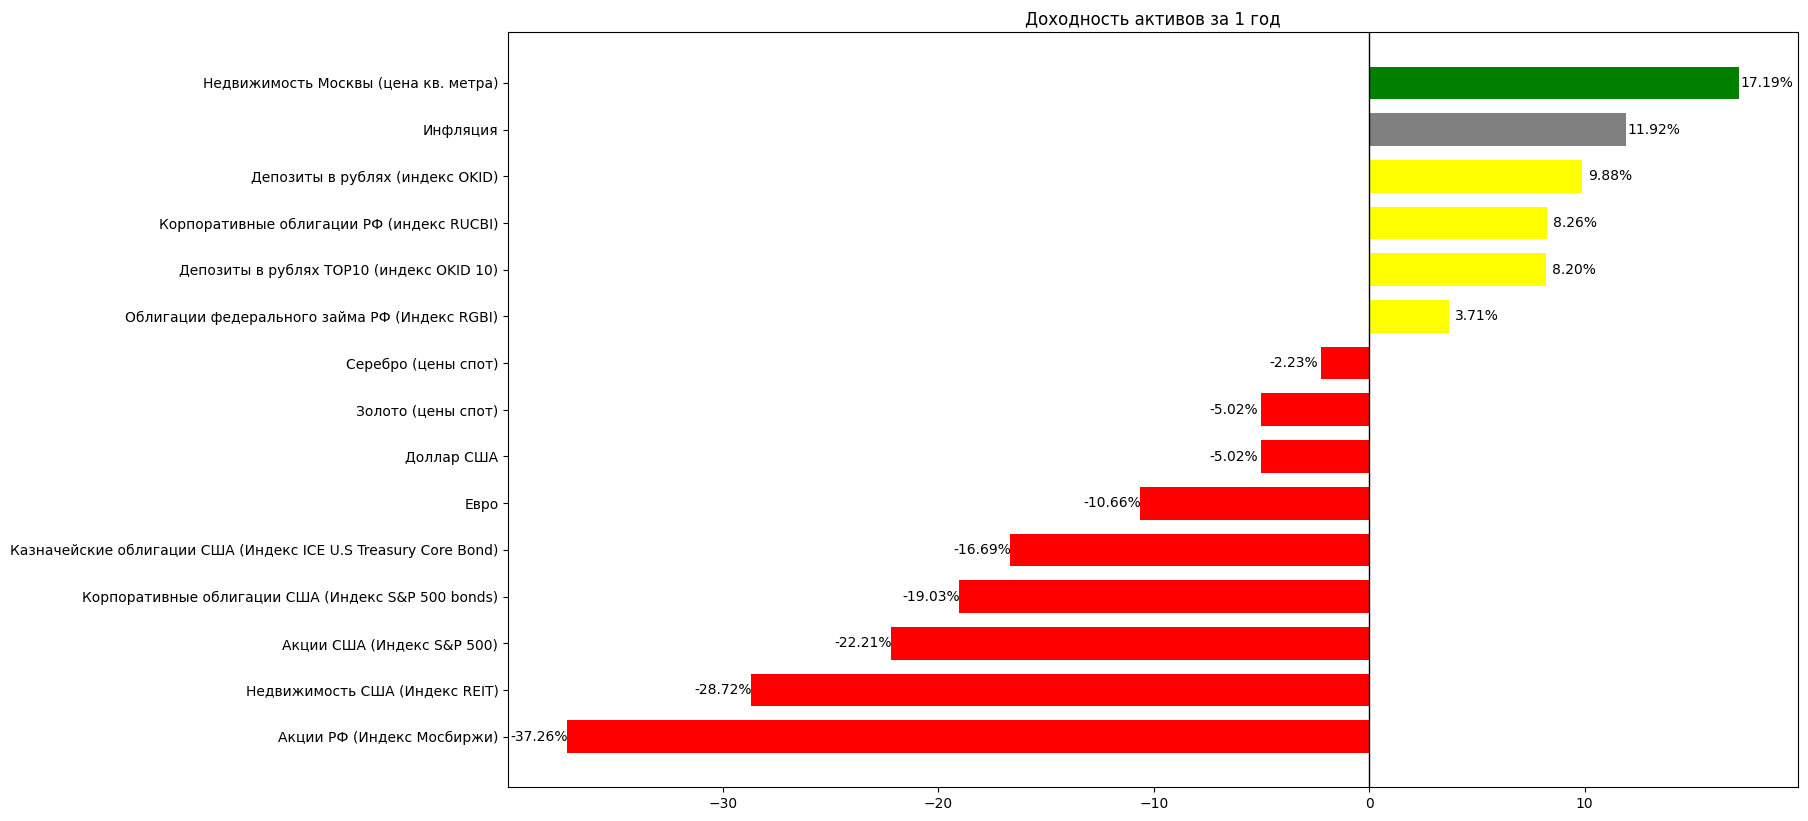

In [44]:
plot_cagr(assets1, lg_2010, 'Доходность активов за 1 год')

In [24]:
assets1.describe()

,property,period,RGBITR.INDX,MCFTR.INDX,SP500TR.INDX,IDCOTCTR.INDX,SP500BDT.INDX,FNER.INDX,MOW_SEC.RE,GC.COMM,SI.COMM,USDRUB.FX,EURRUB.FX,RUCBITR.INDX,OKID10.INDX,OKID.INDX,inflation
0,Compound return,YTD,0.037134,-0.372608,-0.222149,-0.166889,-0.190346,-0.287201,0.171914,-0.050163,-0.022281,-0.050232,-0.106567,0.082586,0.082028,0.098801,0.119228
1,CAGR,1 years,0.037134,-0.372608,-0.222149,-0.166889,-0.190346,-0.287201,0.171914,-0.050163,-0.022281,-0.050232,-0.106567,0.082586,0.082028,0.098801,0.119228
2,CAGR,5 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CAGR,10 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CAGR,"1 years, 1 months",0.0432,-0.359732,-0.166841,-0.149668,-0.170642,-0.196667,0.169984,-0.009917,0.009598,-0.037924,-0.08798,0.09426,0.080052,0.096101,0.117969
5,Dividend yield,LTM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
6,Risk,"1 years, 1 months",0.234717,0.312411,0.468962,0.357392,0.372146,0.458221,0.062171,0.464301,0.668841,0.372692,0.438469,0.131666,0.003574,0.0055,NaN
7,CVAR,"1 years, 1 months",-0.037134,0.397132,0.263835,0.287097,0.30738,0.298225,-0.171914,0.184902,0.226016,0.189228,0.256023,-0.082586,-0.079235,-0.094663,NaN
8,Max drawdowns,"1 years, 1 months",-0.187753,-0.471403,-0.472622,-0.410283,-0.427756,-0.463752,0.0,-0.415912,-0.491968,-0.371422,-0.427535,-0.098099,0.0,0.0,NaN
9,Max drawdowns dates,"1 years, 1 months",2022-02,2022-09,2022-06,2022-06,2022-06,2022-06,2021-12,2022-06,2022-08,2022-06,2022-06,2022-03,2021-12,2021-12,NaN


## Граница эффективности


In [30]:
x = ok.EfficientFrontier(ls_2006, ccy='RUB', first_date='2008-01', last_date='2022-12')
x

symbols          [RGBITR.INDX, MCFTR.INDX, SP500TR.INDX, IDCOTC...
currency                                                       RUB
first_date                                                 2008-01
last_date                                                  2022-12
period_length                                   15 years, 0 months
bounds           ((0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0...
inflation                                                 RUB.INFL
n_points                                                        20
dtype: object

In [31]:
y = ok.EfficientFrontier(ls_2006, ccy='RUB', first_date='2007-01', last_date='2021-12')
y

symbols          [RGBITR.INDX, MCFTR.INDX, SP500TR.INDX, IDCOTC...
currency                                                       RUB
first_date                                                 2007-01
last_date                                                  2021-12
period_length                                   15 years, 0 months
bounds           ((0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0...
inflation                                                 RUB.INFL
n_points                                                        20
dtype: object

In [32]:
df = x.ef_points

In [34]:
df_last_y = y.ef_points

In [35]:
short_names_20ef_points= {
    'RGBITR.INDX': 'Облигации РФ',
    'MCFTR.INDX': 'Акции РФ',
    'SP500TR.INDX': 'Акции США',
    'IDCOTCTR.INDX': 'Казначейские облигации США',
    'SP500BDT.INDX': 'Корпоративные облигации США',
    'FNER.INDX': 'REIT',
    'MOW_SEC.RE': 'Недвижимость Москвы',
    'GC.COMM': 'Золото',
    'SI.COMM': 'Серебро',
    'USDRUB.FX': 'USD',
    'EURRUB.FX': 'EUR',
}

<AxesSubplot: xlabel='Риск', ylabel='Доходность'>

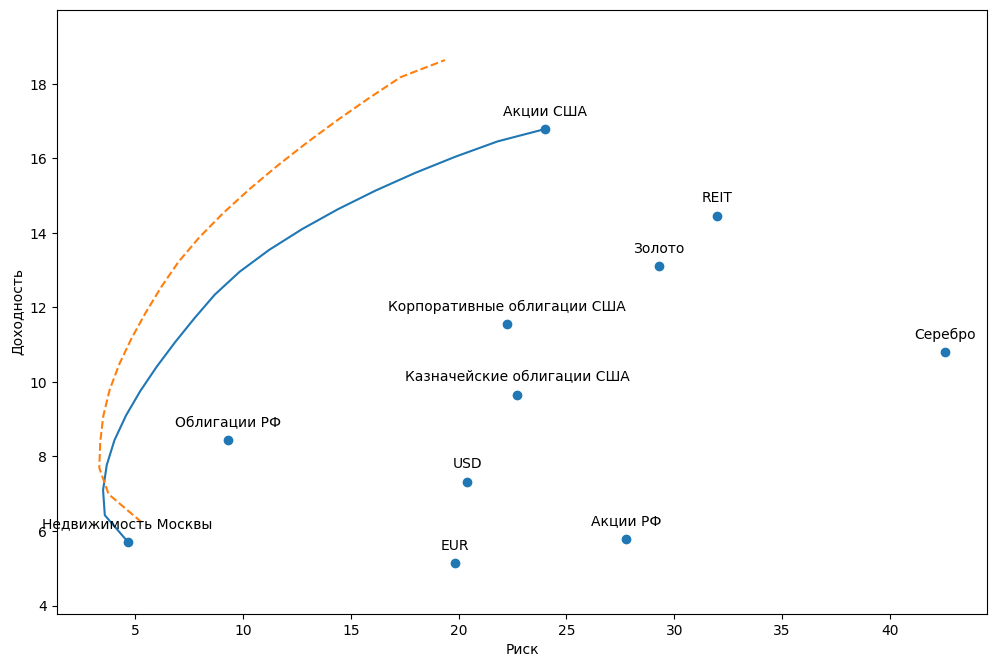

In [42]:
fig, ax = plt.subplots()

# Plotting the Efficient Frontier
ax.plot(df['Risk']*100, df['CAGR']*100)
ax.plot(df_last_y['Risk']*100, df_last_y['CAGR']*100, linestyle='dashed')

# Set X and Y labels
ax.set_xlabel('Риск')
ax.set_ylabel('Доходность')

# Plotting the assets
x.plot_assets(kind='cagr', pct_values=True, tickers=list(short_names_2006.values()))